In [12]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.optimize import curve_fit

from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LassoCV
from sklearn.pipeline import make_pipeline

<br>

***

### 1.7. Example of Non-linear Regression on Sample Dataset

#### heart_rate.txt: Study of Constant Exertion of Time(sec) vs BPM

#### Reference for dataset analysis: https://github.com/APMonitor/learn_python/blob/master/HW04.ipynb

#### Reference for dataset analysis: https://www.youtube.com/watch?v=4vryPwLtjIY




In [13]:
x = pd.read_csv("https://apmonitor.com/che263/uploads/Main/heart_rate.txt")
x

,Time (sec),Heart Rate (BPM)
0,0.0,103
1,5.0,103
2,10.0,103
3,15.0,105
4,20.0,108
...,...,...
236,1180.0,153
237,1185.0,154
238,1190.0,154
239,1195.0,154


In [14]:
def bpm(t, c0, c1, c2, c3):
    return c0+c1*t-c2*np.exp(-c3*t)

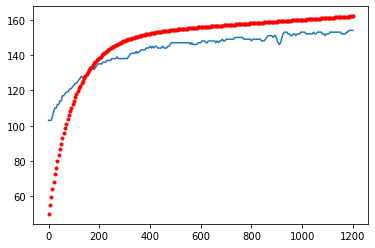

In [15]:
g = [150, 0.01, 100, 0.01]

n = len(x['Time (sec)'])
y = np.empty(n)
for i in range(n):
    y[i] = bpm(x['Time (sec)'][i], g[0], g[1], g[2], g[3])
    

plt.plot(x['Time (sec)'], x['Heart Rate (BPM)'])
plt.plot(x['Time (sec)'], y, 'r.')

#### Fit Using Curve Fit

In [16]:
from scipy.optimize import curve_fit

t = x['Time (sec)'].values
hr = x['Heart Rate (BPM)'].values

# BPM = Function Name, t = object to predict BPM, hr = measured values,
# g = guess values
c, cov = curve_fit(bpm, t, hr, g)
print(c)

[1.42373197e+02 9.24806098e-03 4.00292044e+01 6.84029122e-03]


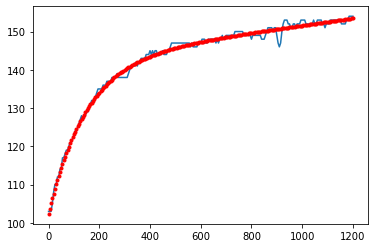

In [17]:

n = len(x['Time (sec)'])
y = np.empty(n)
for i in range(n):
    y[i] = bpm(x['Time (sec)'][i], c[0], c[1], c[2], c[3])
    

plt.plot(x['Time (sec)'], x['Heart Rate (BPM)'])
plt.plot(x['Time (sec)'], y, 'r.')

In [18]:
from sklearn.metrics import r2_score
print('R^2: ', r2_score(y, hr))

R^2:  0.9929887696583418


In [19]:
x = pd.read_csv("https://apmonitor.com/che263/uploads/Main/heart_rate.txt")

In [20]:
from scipy.optimize import curve_fit

t = x['Time (sec)'].values
hr = x['Heart Rate (BPM)'].values

# BPM = Function Name, t = object to predict BPM, hr = measured values,
# g = guess values
c, cov = curve_fit(bpm, t, hr, g)
print(c)

[1.42373197e+02 9.24806098e-03 4.00292044e+01 6.84029122e-03]


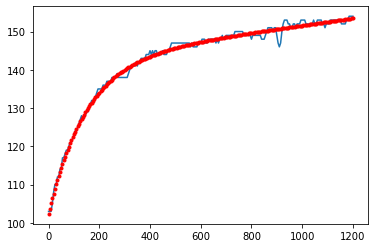

In [21]:

n = len(x['Time (sec)'])
y = np.empty(n)
for i in range(n):
    y[i] = bpm(x['Time (sec)'][i], c[0], c[1], c[2], c[3])
    

plt.plot(x['Time (sec)'], x['Heart Rate (BPM)'])
plt.plot(x['Time (sec)'], y, 'r.')

In [22]:
# Create model variable, set to LinearRegression() function
# Use .fit() to adust weight of x and y data
model = LinearRegression()
model.fit(x, y)

# Print the 2 train and 2 test arrays to screen
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

# Set model function
# Train x and y training arrays
model = LinearRegression().fit(x_train, y_train)

# Use the trained model to predict tests
y_predict = model.predict(x_test)

# Print first 5 rows of x_test predicted data
print(y_predict[0:5])

NameError: name 'x_train' is not defined

Examining the above graph, a curve is noticed in the data as Speed and Power increase. There is a strong concentration of vectors in the bottom left: 0-8 for Speed and 0-10 for Power. Furthermore, there is a concentration in the top right: 17-35 for Speed and 90-110 for Power. Infact it appears from simply looking at the plot that the majority of the vectors of the dataset are located in these two zones.

The dispersion of datapoints will be further explored to examine the relationship. This relationship could be explained by a particular phenomenon that occurs when producing power from wind resources. 

For now, the plot is enough to assume that simple linear regression may not be appropriate for this dataset.

Nevertheless we will carry out Simple Linear Regression on this dataset.

In [23]:
Plot_2 = plt.plot(power, speed, '.')
plt.xlabel("Power")
plt.ylabel("Speed")

coeffs = np.polyfit(power, speed, 1)

plt.plot(power, coeffs[0] * power + coeffs[1], '-')

Plot_2


NameError: name 'power' is not defined

In [24]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.optimize import curve_fit
from sklearn.linear_model import LinearRegression

In [25]:
#columns = “age sex bmi map tc ldl hdl tch ltg glu”.split()
p = pd.read_csv("powerproduction.txt")
df = pd.DataFrame(p)

In [26]:
df = p[["speed", "power"]]

train, test = train_test_split(df, test_size=0.2, random_state=42, 
                               shuffle=True)

In [27]:
train.to_csv('train.csv', index=False)
test.to_csv('test.csv', index=False)

***

In [28]:
power = df["power"]
power = power.values.reshape(500, 1)

speed = df["speed"]
speed = speed.values.reshape(500,1)


model = LinearRegression()
model.fit(power, speed)

LinearRegression()

In [29]:
x = df["speed"]
x = x.values.reshape(500, 1)

y = df["power"]
y = y.values

In [30]:
dataset = pd.read_csv('https://s3.us-west-2.amazonaws.com/public.gamelab.fun/dataset/position_salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

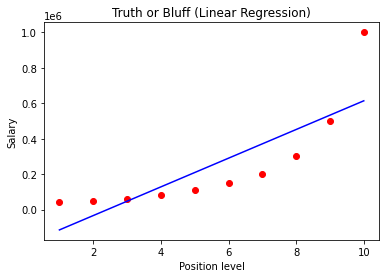

In [31]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Visualizing the Linear Regression results
def viz_linear():
    plt.scatter(X, y, color='red')
    plt.plot(X, lin_reg.predict(X), color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
viz_linear()

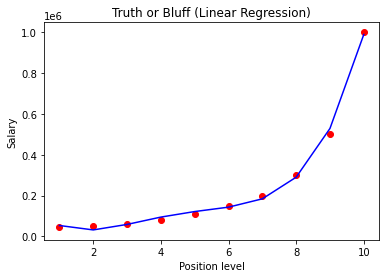

In [32]:

# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(X, y, color='red')
    plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
viz_polymonial()

In [33]:
# Predicting a new result with Linear Regression
lin_reg.predict([[5.5]])
#output should be 249500

# Predicting a new result with Polymonial Regression
pol_reg.predict(poly_reg.fit_transform([[5.5]]))
#output should be 132148.43750003

array([132148.43750012])

In [34]:
# Create a scatterplot graphing predictions against true data
plt.plot(x_train, y_predict2, color='r', label="Linear Regression",
        alpha=.7)
plt.scatter(x_poly, y_test, color='b', label="Test Data",
        alpha=.7)
plt.legend()
plt.title("Powerproduction: Linear Regression")
plt.xlabel("Predicted/Test Speed (Independent Variable)")
plt.ylabel("Test Power (Dependent Variable)")

NameError: name 'x_train' is not defined

(500, 1)
(500, 1) 


(500, 4)
(500, 1)
(500, 1)
14.419973610973688
0.8796883953739737


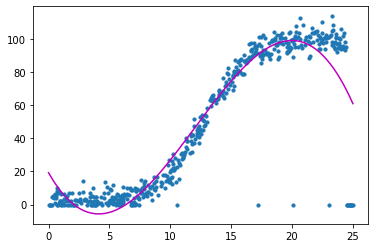

In [35]:
import operator

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

df = pd.read_csv("powerproduction.txt")

np.random.seed(0)
x = df["speed"]
y = df["power"]
y = y.values

# transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]

polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

#print(x_train.shape)
#print(y_train.shape)
print(x.shape)
print(y.shape, "\n\n")

print(x_poly.shape)
print(y.shape)
print(y_poly_pred.shape)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print(rmse)
print(r2)

plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.show()

### Scatterplot of Y-predict Linear Regression

In [92]:
x_train.shape

(375, 1)

In [93]:
y_train.shape

(8,)

In [94]:
x_poly.shape

(500, 4)

In [95]:
y_predict2.shape

(125,)

In [97]:
MAE = mean_absolute_error(y_test, y_predict)
MAE

ValueError: Found input variables with inconsistent numbers of samples: [2, 125]

In [ ]:
plt.scatter(x, y, s=10, color='b')
plt.scatter(x_test, y_test, s=10, color='r')
# sort the values of x before line plot
#sort_axis = operator.itemgetter(0)
#sorted_zip = sorted(zip(x_train,y_poly_pred), key=sort_axis)
#x_train, y_poly_pred = zip(*sorted_zip)
plt.plot(x_train, y_poly_pred, color='black')
plt.show()

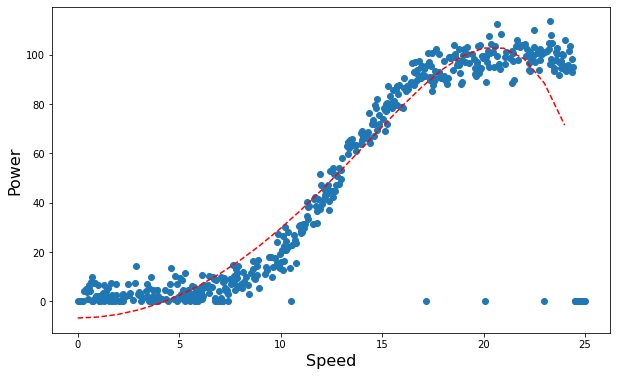

In [157]:
# define the basis function
def basis(x, a, b, c):
    return a * np.power(x, 7) + b * x**2 + c

# choose the input and output variables
x, y = speed, power
# curve fit
exponents, _ = curve_fit(basis, x, y)
# summarize the parameter values
a, b, c = exponents

# plot inputs and outputs
plt.scatter(x, y)

# Use np.arange to inputs from smallest vector to largest
x_array = np.arange(min(x), max(x), 1)
# calculate the output for the range
y_array = basis(x_array, a, b, c)
# create a line plot for the mapping function
plt.plot(x_array, y_array, '--', color='red')
plt.xlabel("Speed")
plt.ylabel("Power")

plt.show()